In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path = '/content/drive/MyDrive/Ship_Performance_Dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
import pandas as pd
df.shape
df.info()
df.head()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

np.int64(0)

In [ ]:

df = df.drop_duplicates()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [ ]:
selected_features = [
    'Operational_Cost_USD',
    'Revenue_per_Voyage_USD',
    'Average_Load_Percentage',
    'Efficiency_nm_per_kWh',
    'Cargo_Weight_tons',
    'Route_Type',
    'Engine_Power_kW',
    'Engine_Type'
]
df_selected = df[selected_features]


In [ ]:
df_encoded = pd.get_dummies(df_selected, drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)


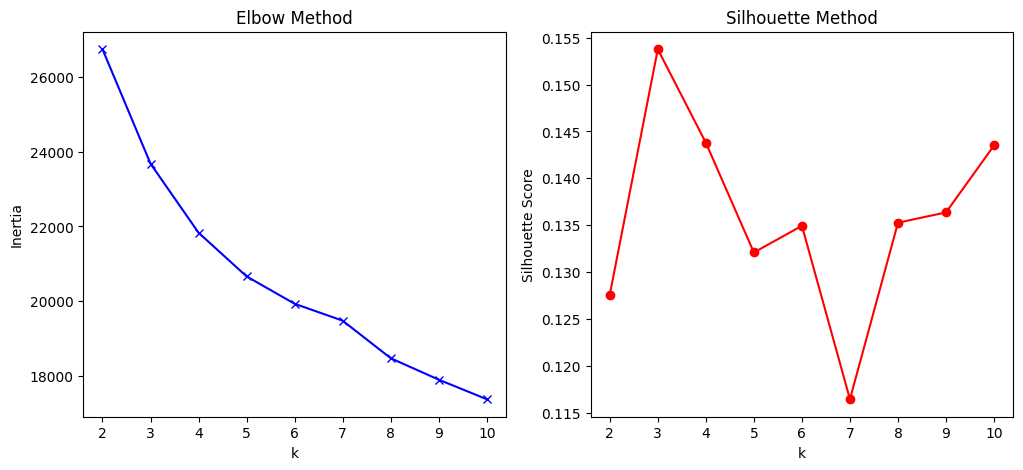

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow Method')


plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('k'); plt.ylabel('Silhouette Score'); plt.title('Silhouette Method')
plt.show()


In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df['Cluster'] = clusters


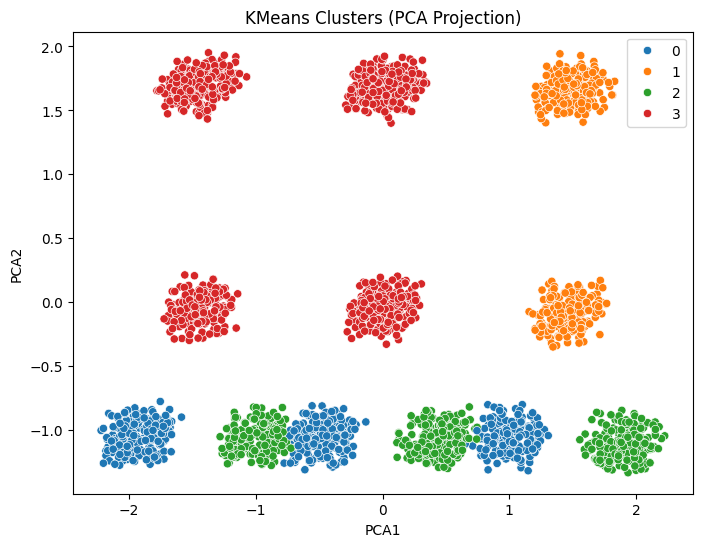

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=df['Cluster'], palette='tab10')
plt.title('KMeans Clusters (PCA Projection)')
plt.xlabel('PCA1'); plt.ylabel('PCA2')
plt.legend()
plt.show()


In [ ]:

cluster_summary = df.groupby('Cluster')[[
    'Operational_Cost_USD',
    'Revenue_per_Voyage_USD',
    'Efficiency_nm_per_kWh',
    'Average_Load_Percentage',
    'Cargo_Weight_tons'
]].mean()

print(cluster_summary)


         Operational_Cost_USD  Revenue_per_Voyage_USD  Efficiency_nm_per_kWh  \
Cluster                                                                        
0               261871.761551           519449.255669               0.796648   
1               255503.166325           505087.191530               0.831645   
2               257654.259801           526352.111557               0.810764   
3               249203.441382           526814.490820               0.777596   

         Average_Load_Percentage  Cargo_Weight_tons  
Cluster                                              
0                      74.945782        1052.172918  
1                      74.472910        1027.677619  
2                      75.980571        1006.066615  
3                      75.257561        1038.805671  
